In [25]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [4]:
img = cv.imread("data/img/sunset.jpg")

In [27]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
original_shape = img.shape

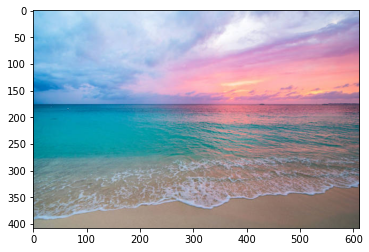

In [28]:
plt.imshow(img)
plt.show()

In [29]:
all_pixels = img.reshape((-1,3))

In [30]:
from sklearn.cluster import KMeans

In [31]:
total_colors = 6
km = KMeans(n_clusters=total_colors)
km.fit(all_pixels)

KMeans(n_clusters=6)

In [32]:
print(km.cluster_centers_)

[[156.77868802 141.21625526 144.01547754]
 [200.75888126 207.98937813 235.05596084]
 [ 18.87095308 144.36723494 166.02500406]
 [117.89309551 114.78972186 114.18403608]
 [233.90385449 162.64207848 180.65642078]
 [141.96017912 177.86863617 219.17130492]]


In [33]:
centers = np.array(km.cluster_centers_, dtype="uint8")

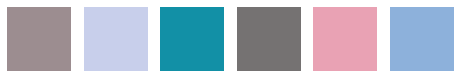

In [34]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,total_colors,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [35]:
print(img.shape)

(408, 612, 3)


In [36]:
new_img = np.zeros((408*612,3),dtype="uint8")

In [37]:
colors

[array([156, 141, 144], dtype=uint8),
 array([200, 207, 235], dtype=uint8),
 array([ 18, 144, 166], dtype=uint8),
 array([117, 114, 114], dtype=uint8),
 array([233, 162, 180], dtype=uint8),
 array([141, 177, 219], dtype=uint8)]

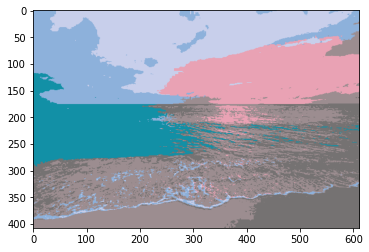

In [38]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()